In [2]:
# os one level up
import os
os.chdir(os.path.dirname(os.getcwd()))

In [5]:
import pandas as pd
from sklearn import neighbors
import lightgbm as lgb
import pickle
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
import datetime
import matplotlib.pyplot as plt
from all_models import *

/home/django/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
start_dt = datetime.datetime(2023, 9, 8, 10, 0, 0)
end_dt = datetime.datetime(2023, 10, 27, 16, 0, 0)
load_data = get_inputs_for_load(start_dt, end_dt)
load_df = preprocess_dict(load_data)
# add 96 lags of load
for i in range(1, 97):
    load_df[f"load-{i}"] = load_df["load"].shift(i)
# add day of week
load_df["day_of_week"] = load_df.index.dayofweek
# Create forward lags for the target variable
for i in range(96):
    load_df[f"forward_load-{i}"] = load_df["load"].shift(-i)
# Drop rows with missing values\
load_df = load_df.dropna()  
# Prepare your data
X = load_df.drop(["load"] + [f"forward_load-{i}" for i in range(96)], axis=1)
y = load_df[[f"forward_load-{i}" for i in range(96)]]

/tmp/ipykernel_36759/559595159.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  load_df[f"forward_load-{i}"] = load_df["load"].shift(-i)
/tmp/ipykernel_36759/559595159.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  load_df[f"forward_load-{i}"] = load_df["load"].shift(-i)
/tmp/ipykernel_36759/559595159.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

Index(['hour', 'load-1', 'load-2', 'load-3', 'load-4', 'load-5', 'load-6',
       'load-7', 'load-8', 'load-9', 'load-10', 'load-11', 'load-12',
       'load-13', 'load-14', 'load-15', 'load-16', 'load-17', 'load-18',
       'load-19', 'load-20', 'load-21', 'load-22', 'load-23', 'load-24',
       'load-25', 'load-26', 'load-27', 'load-28', 'load-29', 'load-30',
       'load-31', 'load-32', 'load-33', 'load-34', 'load-35', 'load-36',
       'load-37', 'load-38', 'load-39', 'load-40', 'load-41', 'load-42',
       'load-43', 'load-44', 'load-45', 'load-46', 'load-47', 'load-48',
       'load-49', 'load-50', 'load-51', 'load-52', 'load-53', 'load-54',
       'load-55', 'load-56', 'load-57', 'load-58', 'load-59', 'load-60',
       'load-61', 'load-62', 'load-63', 'load-64', 'load-65', 'load-66',
       'load-67', 'load-68', 'load-69', 'load-70', 'load-71', 'load-72',
       'load-73', 'load-74', 'load-75', 'load-76', 'load-77', 'load-78',
       'load-79', 'load-80', 'load-81', 'load-82', '

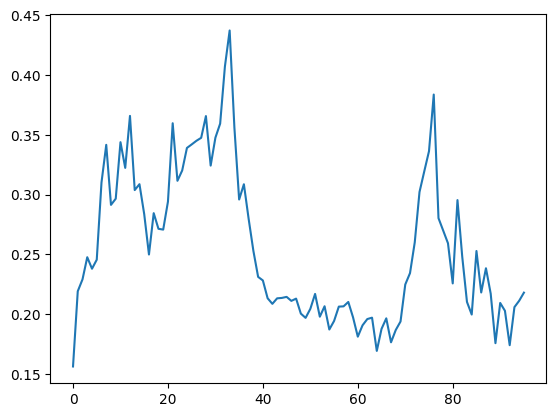

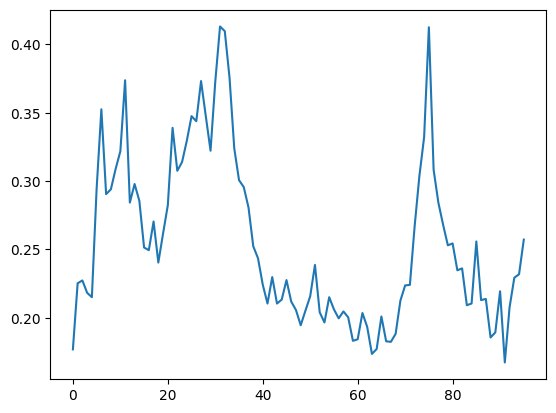

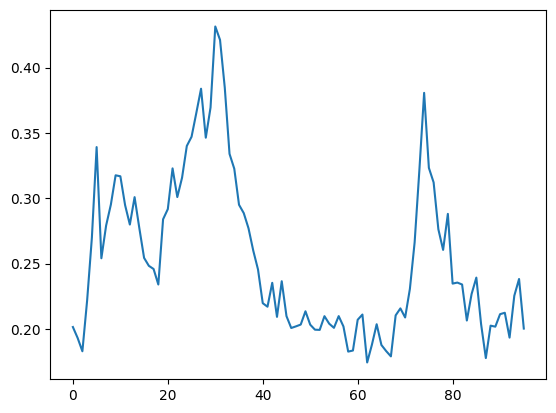

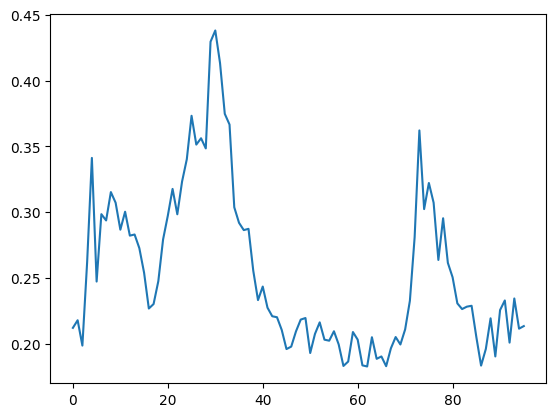

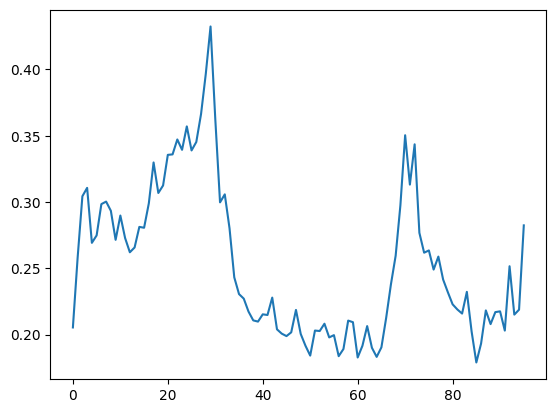

In [16]:
# predict next 24 hours of load
start_str = start_dt.strftime("%Y-%m-%d_%H:%M:%S")
end_str = end_dt.strftime("%Y-%m-%d_%H:%M:%S")
# load model from load_model_file = f"forecasting/models/load_model_{start_str}_{end_str}.pkl"
load_model_file = f"forecasting/models/load_model_{start_str}_{end_str}.pkl"
with open(load_model_file, "rb") as f:
    load_model = pickle.load(f)
print(X.columns)
preds = load_model.predict(X.iloc[:5])
for row in preds:
    plt.plot(row)
    plt.show()

In [13]:
# prepare solar data for input
start_str = start_dt.strftime("%Y-%m-%d_%H:%M:%S")
end_str = end_dt.strftime("%Y-%m-%d_%H:%M:%S")
house = 1
pv_file = f"data/houses/house_{house}/{start_str}_{end_str}/environment/solar_imputed.csv"
solar_data = pd.read_csv(pv_file, index_col="datetime", parse_dates=True)
# add 24 lags of solar generation
for i in range(1, 97):
    solar_data[f"solar-{i}"] = solar_data["SolarPv_0 (kW)"].shift(i)
# add time of day
solar_data["hour"] = solar_data.index.hour
# Create forward lags for the target variable
for i in range(96):
    solar_data[f"forward_solar-{i}"] = solar_data["SolarPv_0 (kW)"].shift(-i)
# Drop rows with missing values
solar_data = solar_data.dropna()
# Prepare your data
X = solar_data.drop(["SolarPv_0 (kW)"] + [f"forward_solar-{i}" for i in range(96)], axis=1)
print(X.head())
print(X.columns)
y = solar_data[[f"forward_solar-{i}" for i in range(96)]]


/tmp/ipykernel_36759/3010012846.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  solar_data[f"forward_solar-{i}"] = solar_data["SolarPv_0 (kW)"].shift(-i)
/tmp/ipykernel_36759/3010012846.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  solar_data[f"forward_solar-{i}"] = solar_data["SolarPv_0 (kW)"].shift(-i)
/tmp/ipykernel_36759/3010012846.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

                            solar-1   solar-2   solar-3   solar-4   solar-5  \
datetime                                                                      
2023-09-09 10:00:00+00:00  1.081783  1.313795  1.244066  1.164499  1.068455   
2023-09-09 10:15:00+00:00  1.453905  1.081783  1.313795  1.244066  1.164499   
2023-09-09 10:30:00+00:00  1.500855  1.453905  1.081783  1.313795  1.244066   
2023-09-09 10:45:00+00:00  1.541197  1.500855  1.453905  1.081783  1.313795   
2023-09-09 11:00:00+00:00  1.580093  1.541197  1.500855  1.453905  1.081783   

                            solar-6   solar-7   solar-8   solar-9  solar-10  \
datetime                                                                      
2023-09-09 10:00:00+00:00  0.958851  0.861103  0.761907  0.658730  0.570177   
2023-09-09 10:15:00+00:00  1.068455  0.958851  0.861103  0.761907  0.658730   
2023-09-09 10:30:00+00:00  1.164499  1.068455  0.958851  0.861103  0.761907   
2023-09-09 10:45:00+00:00  1.244066  1.164499  1.06

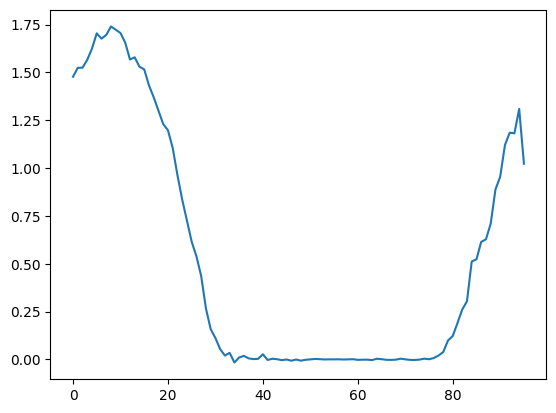

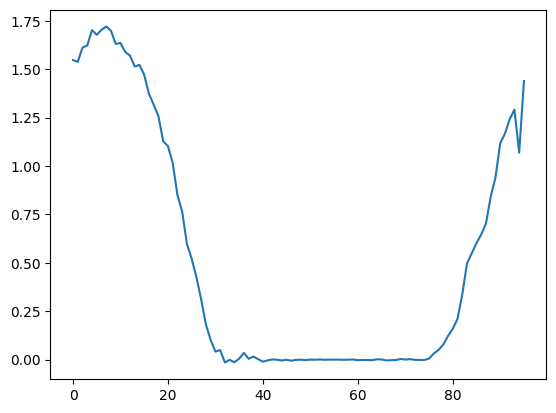

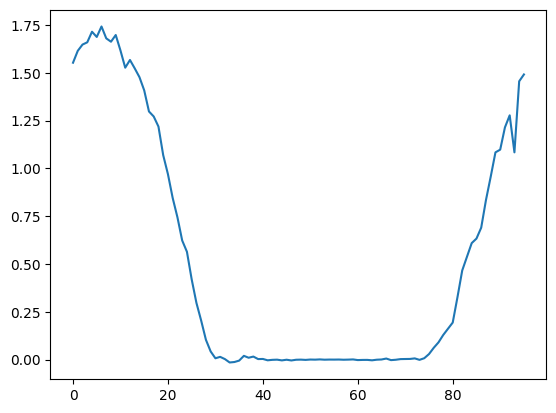

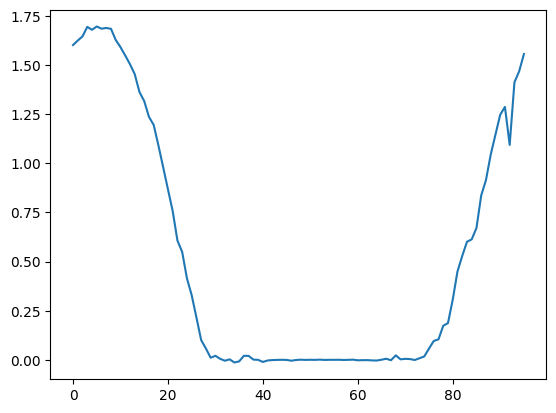

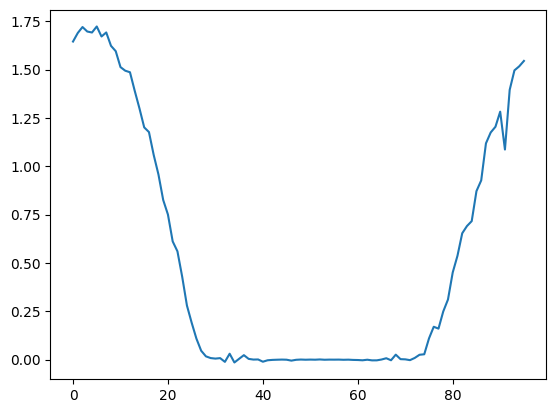

In [9]:
pv_model_file = f"forecasting/models/pv_model_{start_str}_{end_str}_{house}.pkl"
# predict next 24 hours of solar for building 1
with open(pv_model_file, "rb") as f:
    pv_model = pickle.load(f)
preds = pv_model.predict(X.iloc[:5])
for row in preds:
    plt.plot(row)
    plt.show()